#Question 1-B


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
#Data CSV File
data = pd.read_csv("/content/Fish Data - A2.csv")

In [29]:
mean_h = data['Height'].mean()
mean_w = data['Width'].mean()
mean_weight = data['Weight'].mean()

std_h = data['Height'].std()
std_w = data['Width'].std()
std_dev_weight = data['Weight'].std()

In [30]:
#Normalizing the Data using Mean and Standard Deviation

data['Height'] = (data['Height'] - mean_h) / std_h
data['Width'] = (data['Width'] - mean_w) / std_w
data['Weight'] = (data['Weight'] - mean_weight) / std_dev_weight

In [31]:
data = data.fillna(data.mean())

In [32]:
data = data.sample(frac=1, random_state=40).reset_index(drop=True)

In [33]:
X = data[['Height', 'Width']].values
Y = data['Weight'].values

In [34]:
#Splitting the Data into Training and Testing data

split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

In [35]:
Total_range = list(range(1, 10))
Iterations = 500
learning_rate = 0.000005

In [41]:
mse_list_train = []
mse_list_test = []
mse_epoch_train = []

In [42]:
x_grid = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_grid = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

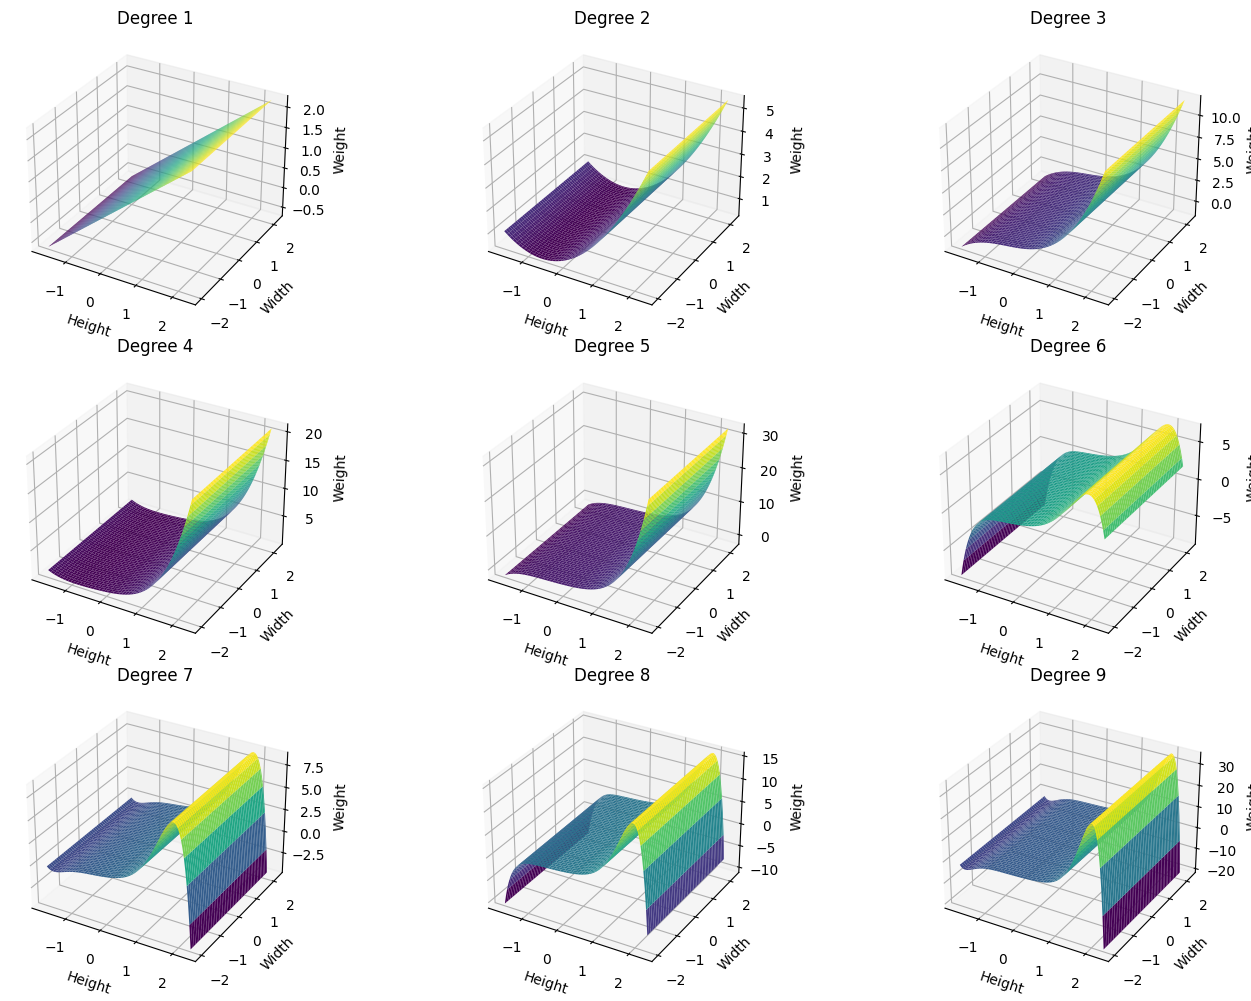

In [43]:
fig = plt.figure(figsize=(15, 10))
for i, degree in enumerate(Total_range):

    # Create polynomial features
    poly_train_X = np.column_stack([X_train[:, 0] ** d for d in range(degree + 1)])
    X_poly_test = np.column_stack([X_test[:, 0] ** d for d in range(degree + 1)])
    X_grid_poly = np.column_stack([x_grid.ravel() ** d for d in range(degree + 1)])

    # Initialize theta randomly using random function
    np.random.seed(0)
    theta = np.random.rand(degree + 1)

    epoch_train_mse = []

    for epoch in range(Iterations):
        grid_pred_Y = X_grid_poly @ theta
        train_pred_Y = poly_train_X @ theta

        train_mse = np.mean((train_pred_Y - Y_train) ** 2)
        epoch_train_mse.append(train_mse)

        gradient = -(2 / len(Y_train)) * (poly_train_X.T @ (Y_train - train_pred_Y))

        theta -= learning_rate * gradient

    mse_epoch_train.append(epoch_train_mse)
    train_pred_Y = poly_train_X @ theta
    Y_test_pred = X_poly_test @ theta

    z_grid = grid_pred_Y.reshape(x_grid.shape)


    train_mse = np.mean((train_pred_Y - Y_train) ** 2)
    test_mse = np.mean((Y_test_pred - Y_test) ** 2)

    mse_list_train.append(train_mse)
    mse_list_test.append(test_mse)

    var = fig.add_subplot(3, 3, i + 1, projection='3d')
    var.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
    var.set_xlabel('Height')
    var.set_ylabel('Width')
    var.set_zlabel('Weight')
    var.set_title(f'Degree {degree}')

plt.tight_layout()
plt.show()

In [39]:
#Printing the best degree obtained

best_degree = np.argmin(mse_list_test) + 1
print(best_degree)

1


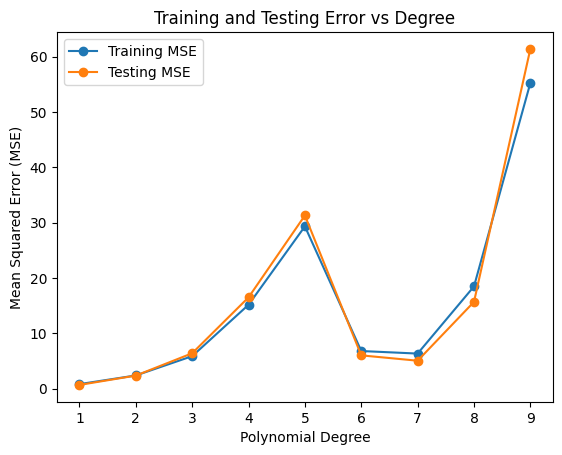

In [44]:
# Plot the MSE values for different degrees stored in x

x_range = np.arange(1, 10)

plt.plot(x_range, mse_list_train, label='Training MSE', marker='o')
plt.plot(x_range, mse_list_test, label='Testing MSE', marker = 'o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing Error vs Degree')
plt.xticks(x_range, Total_range)
plt.legend()
plt.show()

### The best polynomial degree we are obtaining is 1

#Regularization of Polynomial Regression
##Batch Gradient Descent


In [45]:
degree = best_degree

In [47]:
learning_rate = 0.001
Iterations = 1000
reg_lambda = 0.01
reg_q = [0.5,1,2,4]
epoch_train_mse = []
mse_list_train = []
mse_list_test = []

In [48]:
x_grid = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_grid = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

poly_train_X = np.column_stack([X_train[:, 0] ** d for d in range(degree + 1)])
X_poly_test = np.column_stack([X_test[:, 0] ** d for d in range(degree + 1)])
X_grid_poly = np.column_stack([x_grid.ravel() ** d for d in range(degree + 1)])

np.random.seed(0)
theta = np.random.rand(degree + 1)


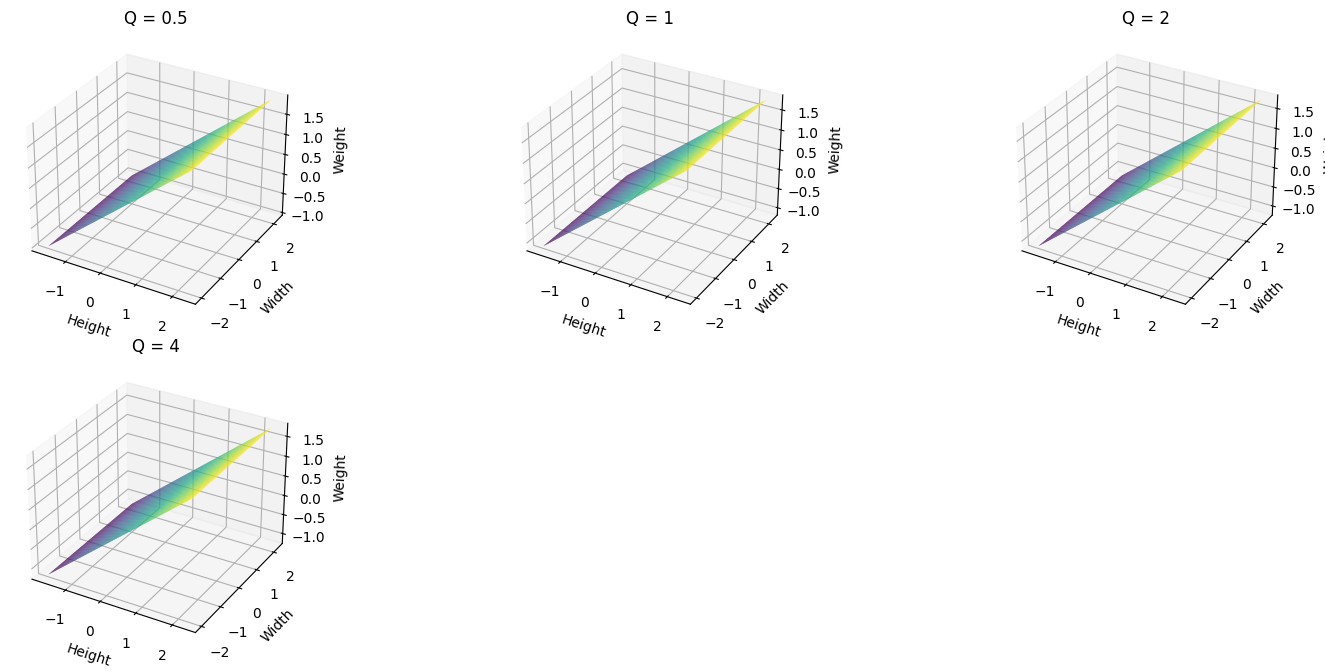

In [49]:
fig = plt.figure(figsize=(15, 10))

best_mse = float('inf')
best_q = None

for i,q in enumerate(reg_q):
    for epoch in range(Iterations):
        grid_pred_Y = X_grid_poly @ theta
        train_pred_Y = poly_train_X @ theta

        gradient = -(1 / len(Y_train)) * (poly_train_X.T @ (Y_train - train_pred_Y)) + reg_lambda * (np.abs(theta) ** q)

        theta -= learning_rate * gradient

        train_mse = np.mean((train_pred_Y - Y_train) ** 2)
        epoch_train_mse.append(train_mse)


    train_pred_Y = poly_train_X @ theta
    Y_test_pred = X_poly_test @ theta

    train_mse = np.mean((train_pred_Y - Y_train) ** 2)
    test_mse = np.mean((Y_test_pred - Y_test) ** 2)

    mse_list_train.append(train_mse)
    mse_list_test.append(test_mse)

    if (test_mse < best_mse):
          best_mse = test_mse
          best_q = q

    z_grid = grid_pred_Y.reshape(x_grid.shape)

    var = fig.add_subplot(3, 3, i + 1, projection='3d')
    var.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
    var.set_xlabel('Height')
    var.set_ylabel('Width')
    var.set_zlabel('Weight')
    var.set_title(f'Q = {q}')

plt.tight_layout()
plt.show()

##Best Mean Square Error and value of Q for Batch Gradient Descent

In [50]:
print(f"Best obtained value of MSE : {best_mse}")
print(f"Best obtained value of Q : {best_q}")

Best obtained value of MSE : 0.2221849260314163
Best obtained value of Q : 4


#Regularization of Polynomial Regression
##Stochastic Gradient Descent


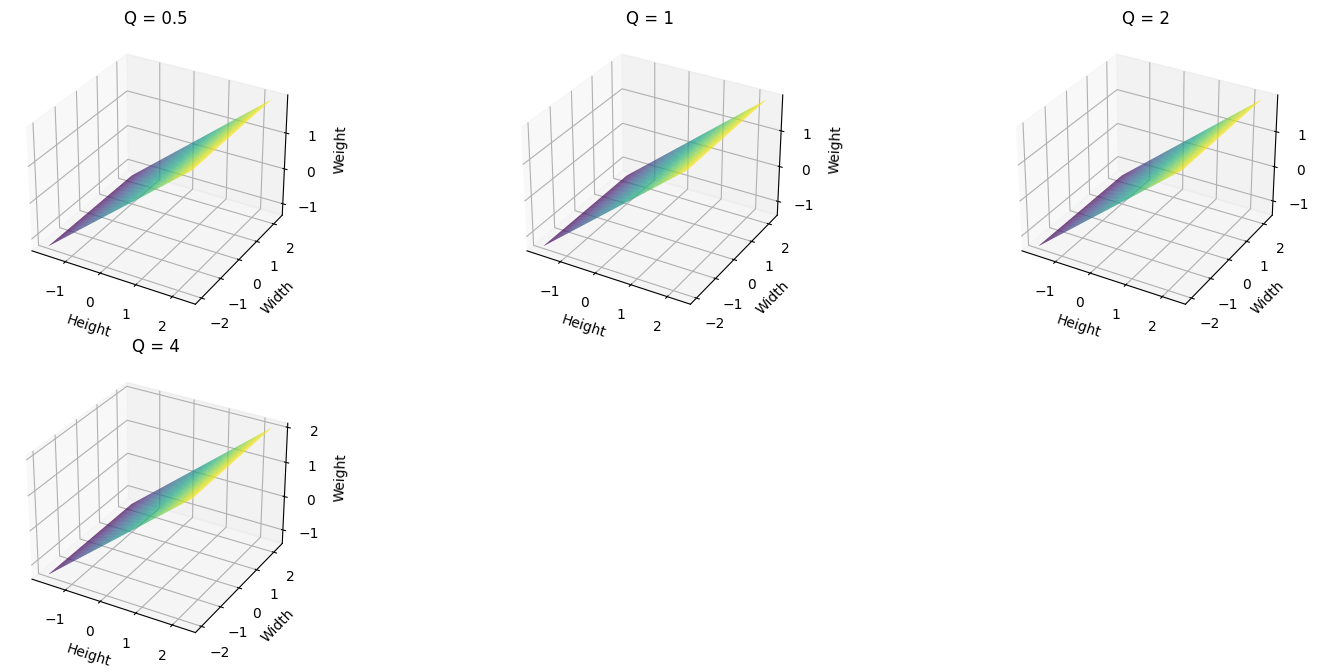

In [51]:
learning_rate = 0.001
Iterations = 1000
reg_lambda = 0.01
reg_q = [0.5,1,2,4]
epoch_train_mse = []
train_mse_list = []
test_mse_list = []
batch_size = 1
n = len(Y)
# print(Y)

x_grid = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_grid = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

X_poly_train = np.column_stack([X_train[:, 0] ** d for d in range(degree + 1)])
X_poly_test = np.column_stack([X_test[:, 0] ** d for d in range(degree + 1)])
X_grid_poly = np.column_stack([x_grid.ravel() ** d for d in range(degree + 1)])

np.random.seed(0)
theta = np.random.rand(degree + 1)
# print(X_poly_train)

fig = plt.figure(figsize=(15, 10))
best_mse = float('inf')
best_q = None

n=127
for i,q in enumerate(reg_q):
    for epoch in range(Iterations):
      indices = np.random.choice(n, batch_size, replace=False)
      X_poly_train = np.column_stack([X_train[indices[0]] ** d for d in range(degree + 1)])
      Y_poly_train = Y_train[indices]

      Y_grid_pred = X_grid_poly @ theta
      Y_train_pred = X_poly_train @ theta



      gradient = -(1 / len(Y_poly_train)) * (X_poly_train.T @ (Y_poly_train - Y_train_pred)) + reg_lambda * (np.abs(theta) ** q)

      theta -= learning_rate * gradient

      train_mse = np.mean((Y_train_pred - Y_poly_train) ** 2)
      epoch_train_mse.append(train_mse)


    Y_train_pred = X_poly_train @ theta
    Y_test_pred = X_poly_test @ theta

    train_mse = np.mean((Y_train_pred - Y_poly_train) ** 2)
    test_mse = np.mean((Y_test_pred - Y_test) ** 2)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

    if (test_mse < best_mse):
      best_mse = test_mse
      best_q = q

    z_grid = Y_grid_pred.reshape(x_grid.shape)

    var = fig.add_subplot(3, 3, i + 1, projection='3d')
    var.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
    var.set_xlabel('Height')
    var.set_ylabel('Width')
    var.set_zlabel('Weight')
    var.set_title(f'Q = {q}')

plt.tight_layout()
plt.show()

In [52]:
print(f"Best obtained value of MSE : {best_mse}")
print(f"Best obtained value of Q : {best_q}")

Best obtained value of MSE : 0.23415358107583728
Best obtained value of Q : 1
